# Introduction
#### 数据集
针对培训课程测试明智的学员绩效数据集  
#### 任务
是根据人口统计信息和培训计划/测试详细信息来预测此类测试的性能。  
#### 目的
通过找出最重要的因素来提高受训者的参与度和表现，这将使该公司加强其培训问题

# descriptive features
- id_num  唯一ID
- program_id  程序的ID
- program_type  程序类型
- program_duration  计划持续时间（天）
- test_id  测试ID
- test_type  测试类型（离线/在线）
- difficulty_level  测试难度级别
- trainee_id  学员的ID
- gender  受训者性别
- education  学员的教育水平
- city_tier  实习生居住城市的等级
- age  受训者年龄
- total_programs_enrolled  总课程的学生通过实习
- is_handicapped  受训者是否患有残疾？
- trainee_engagement_rating  讲师/教学助理为课程提供学员参与度
- is_pass 0  测试失败，1  测试通过

In [15]:
import numpy as np
import pandas as pd 

In [16]:
#可视化用的库
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

导入数据

In [17]:
train = pd.read_csv("mid_term_exams/data/train/train.csv",encoding='utf-8')
test = pd.read_csv('mid_term_exams/data/test/test2.csv',encoding='utf-8')

#数据集copy
train_org = train.copy()
test_org = test.copy()

简单数据eda

In [18]:
len(train),len(test)

(49998, 11465)

In [19]:
train.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


In [20]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

In [21]:
train.dtypes.to_frame().rename(columns={0:'Column type'})

,Column type
id_num,object
program_type,object
program_id,object
program_duration,float64
test_id,float64
test_type,object
difficulty_level,object
trainee_id,float64
gender,object
education,object


In [22]:
#检查是否有缺失值
train.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
id_num,0
program_type,731
program_id,699
program_duration,675
test_id,725
test_type,702
difficulty_level,703
trainee_id,739
gender,707
education,702


<AxesSubplot:>

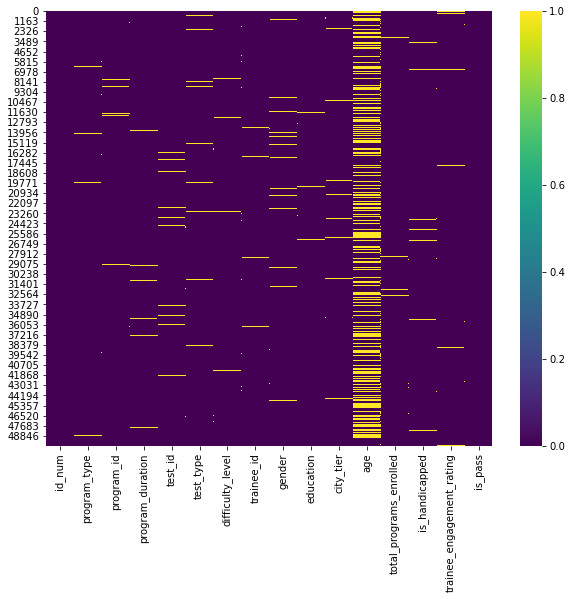

In [23]:
#可视化所有的缺失值
plt.figure(figsize=(10,8));
sns.heatmap(train.isnull(), cmap='viridis')

In [24]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [25]:
test.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,11465.000000,11465.000000,11465.000000,11465.000000,7068.000000,11465.000000,11451.000000,0.0
mean,128.179067,90.116616,9801.775142,2.232708,36.352292,2.581771,2.382150,NaN
std,6.890919,51.172182,5658.995423,1.012618,8.993219,1.229564,1.314206,NaN
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,NaN
25%,121.000000,44.000000,5054.000000,1.000000,28.000000,2.000000,1.000000,NaN
50%,131.000000,89.000000,9580.000000,2.000000,39.000000,2.000000,2.000000,NaN
75%,134.000000,134.000000,14429.000000,3.000000,45.000000,3.000000,3.000000,NaN
max,136.000000,187.000000,20096.000000,4.000000,59.000000,12.000000,5.000000,NaN


开始逐一清洗数据

In [26]:
train.difficulty_level[train.difficulty_level.isnull()] = train.difficulty_level.dropna().mode().values
train.education[train.education.isnull()] = train.education.dropna().mode().values
train.city_tier[train.city_tier.isnull()] = train.city_tier.dropna().mode().values
train.age[train.age.isnull()] = train.age.dropna().mean()
train.test_type[train.test_type.isnull()] = train.test_type.dropna().mode().values
train.program_duration[train.program_duration.isnull()] = train.program_duration.dropna().mode().values
train.total_programs_enrolled[train.total_programs_enrolled.isnull()] = train.total_programs_enrolled.dropna().mode().values
train.is_handicapped[train.is_handicapped.isnull()] = train.is_handicapped.dropna().mode().values
train.trainee_engagement_rating[train.trainee_engagement_rating.isnull()] = train.trainee_engagement_rating.dropna().mode().values

#其他难以表示的缺失值直接删除
train.dropna(axis=0, how='any', inplace=True)

In [27]:
#检查是否有缺失值
train.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
id_num,0
program_type,0
program_id,0
program_duration,0
test_id,0
test_type,0
difficulty_level,0
trainee_id,0
gender,0
education,0


### 为模型导入做准备
处理测试集，为了达到相同的数据格式
需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。  


In [28]:
test.difficulty_level[test.difficulty_level.isnull()] = test.difficulty_level.dropna().mode().values
test.education[test.education.isnull()] = test.education.dropna().mode().values
test.city_tier[test.city_tier.isnull()] = test.city_tier.dropna().mode().values
test.age[test.age.isnull()] = test.age.dropna().mean()
test.test_type[test.test_type.isnull()] = test.test_type.dropna().mode().values
test.program_duration[test.program_duration.isnull()] = test.program_duration.dropna().mode().values
test.total_programs_enrolled[test.total_programs_enrolled.isnull()] = test.total_programs_enrolled.dropna().mode().values
test.is_handicapped[test.is_handicapped.isnull()] = test.is_handicapped.dropna().mode().values
test.trainee_engagement_rating[test.trainee_engagement_rating.isnull()] = test.trainee_engagement_rating.dropna().mode().values

#其他难以表示的缺失值直接删除
train.dropna(axis=0, how='any', inplace=True)

In [29]:
#检查是否有缺失值
#找到每一列的缺失值
train.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
id_num,0
program_type,0
program_id,0
program_duration,0
test_id,0
test_type,0
difficulty_level,0
trainee_id,0
gender,0
education,0


看到全部都是0了，真是舒服极了

In [30]:
#这个是特征性id
id_col = 'id_num'
#这个是预测目标
target_col = 'is_pass'


#数值类型的列
digital_cols = ['program_duration','test_id','age','trainee_id','city_tier','total_programs_enrolled','trainee_engagement_rating']
#非数值类型的列
category_cols = ['program_type','test_type','difficulty_level','gender','education','is_handicapped']

In [31]:
digital_cols

['program_duration',
 'test_id',
 'age',
 'trainee_id',
 'city_tier',
 'total_programs_enrolled',
 'trainee_engagement_rating']

处理数值行  
做聚类分析的时候可以发现，聚类的效果往往特别受其中一列数据的影响，使得原本应该散布在二维平面图上的点，变成聚集在一条线上的点。所以为了避免这个情况，采用数据归一化处理，使数值落在【0，1】之间

In [32]:
from sklearn.preprocessing import MinMaxScaler
sacalar = MinMaxScaler()
train_digital = sacalar.fit_transform(train[digital_cols])
test_digital = sacalar.transform(test[digital_cols])

处理非数值行  
先看看单个变量之间的对通过率的影响  
为了后续的特征分析

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_category, test_category = None, None
for col in category_cols:
    lbe, ohe = LabelEncoder(), OneHotEncoder()
    
    #Fit label encoder and return encoded labels.
    lbe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))#把列名塞到字典中
    train[col] = lbe.transform(train[col])#进行transform得到索引值
    test[col] = lbe.transform(test[col])#得到索引值
    
    #将分类特征编码为one-hot数字数组
    ohe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
    oht_train = ohe.transform(train[col].values.reshape(-1, 1)).todense()
    oht_test = ohe.transform(test[col].values.reshape(-1, 1)).todense()
    
    if train_category is None:
        train_category = oht_train
        test_category = oht_test
    else:
        train_category = np.hstack((train_category, oht_train))
        test_category = np.hstack((test_category, oht_test))

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\utils\valida

In [34]:
train_features = np.hstack((train_digital, train_category))#合并数值型和非数值型
test_features = np.hstack((test_digital, test_category))
train_features.shape, test_features.shape

((46504, 29), (11465, 29))

In [35]:
train_digital.shape, test_digital.shape, train_category.shape, test_category.shape

((46504, 7), (11465, 7), (46504, 22), (11465, 22))

In [36]:
train[target_col].unique()

array([0, 1], dtype=int64)

In [37]:
train['is_pass'].dtype
train_labels = train[target_col]
train_labels

0        0
1        1
2        1
3        1
4        1
        ..
49993    1
49994    1
49995    1
49996    1
49997    1
Name: is_pass, Length: 46504, dtype: int64

<AxesSubplot:ylabel='is_pass'>

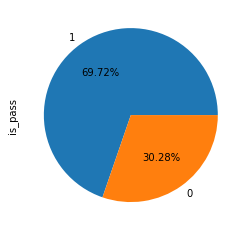

In [38]:
#在可视化中使用所有数据
df = pd.concat([train,test], axis=0)
train['is_pass'].value_counts().plot.pie(autopct = '%1.2f%%')

数据相关性分析中，经常用到data.corr()函数，data.corr()表示了data中的两个变量之间的相关性，取值范围为[-1,1],取值接近-1，表示反相关，类似反比例函数，取值接近1，表正相关。

In [39]:
corr = train.corr()
corr['is_pass'].sort_values(ascending=False)[1:].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,is_pass
trainee_engagement_rating,0.194157
test_type,0.150572
program_type,0.082905
test_id,0.074343
age,0.060022
trainee_id,0.037678
gender,0.021949
program_duration,0.005361
total_programs_enrolled,-0.031246
is_handicapped,-0.037329


In [385]:
Correlation = pd.DataFrame(train[
 ['trainee_engagement_rating', 'test_type', 'program_type', 'test_id', 'age', 'trainee_id','gender', 'program_duration', 'total_programs_enrolled', 
  'is_handicapped', 'city_tier']])

<AxesSubplot:title={'center':'Correlation of Features'}>

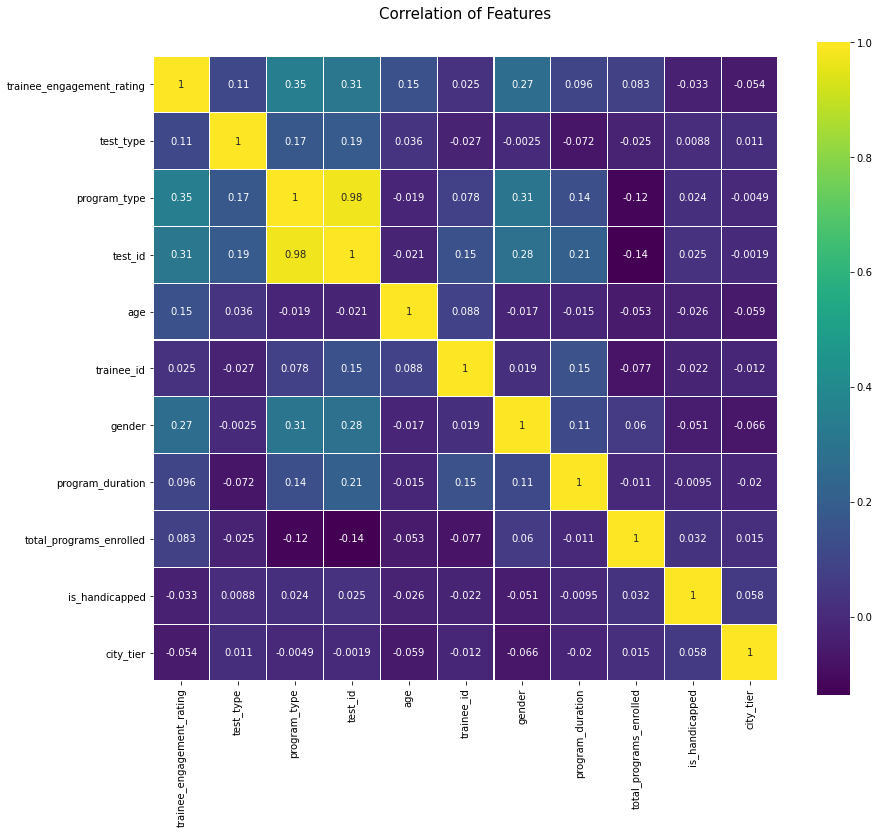

In [386]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### 性别与是否通过的关系  
可见男女通过率相差不多，但是男生略胜一筹

<AxesSubplot:xlabel='gender'>

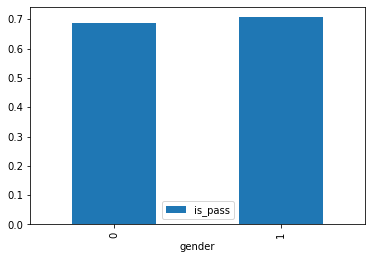

In [387]:
train[['gender','is_pass']].groupby(['gender']).mean().plot.bar()

#### 测试形式与是否通过的关系  
分析可知线上测试的通过率更高

<AxesSubplot:xlabel='test_type'>

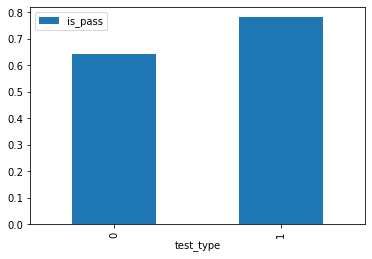

In [388]:
train.groupby(['test_type','is_pass'])['is_pass'].count()
train[['test_type','is_pass']].groupby(['test_type']).mean().plot.bar()

#### 程序类型与是否通过的关系

<AxesSubplot:xlabel='program_type'>

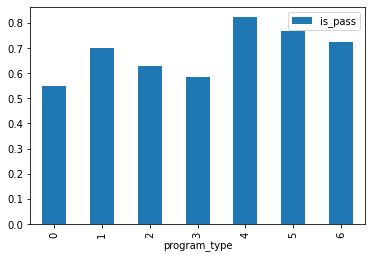

In [389]:
train.groupby(['program_type','is_pass'])['is_pass'].count()
train[['program_type','is_pass']].groupby(['program_type']).mean().plot.bar()

#### 计划持续时间与是否通过的关系

<AxesSubplot:xlabel='program_duration'>

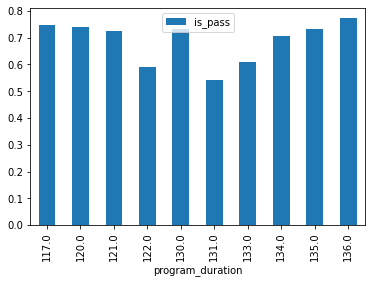

In [390]:
train.groupby(['program_duration','is_pass'])['is_pass'].count()
train[['program_duration','is_pass']].groupby(['program_duration']).mean().plot.bar()

#### 难度等级与是否通过的关系

<AxesSubplot:xlabel='difficulty_level'>

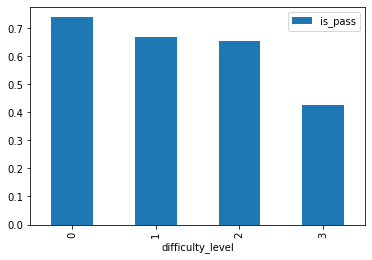

In [391]:
train.groupby(['difficulty_level','is_pass'])['is_pass'].count()
train[['difficulty_level','is_pass']].groupby(['difficulty_level']).mean().plot.bar()

#### 教育与是否通过的关系

<AxesSubplot:xlabel='education'>

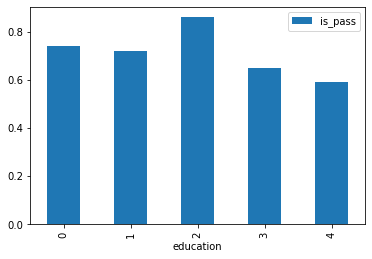

In [392]:
train.groupby(['education','is_pass'])['is_pass'].count()
train[['education','is_pass']].groupby(['education']).mean().plot.bar()

#### 城市等级与是否通过的关系

<AxesSubplot:xlabel='city_tier'>

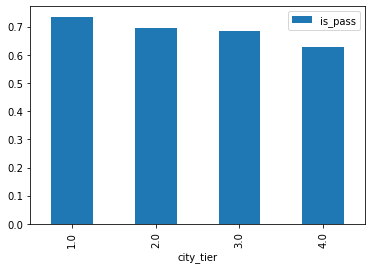

In [393]:
train.groupby(['city_tier','is_pass'])['is_pass'].count()
train[['city_tier','is_pass']].groupby(['city_tier']).mean().plot.bar()

#### 总课程学生通过实习与是否通过的关系

<AxesSubplot:xlabel='total_programs_enrolled'>

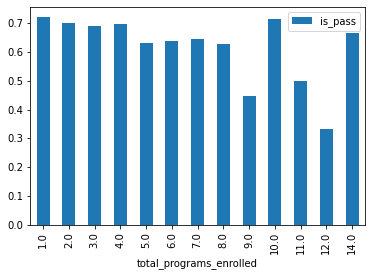

In [394]:
train.groupby(['total_programs_enrolled','is_pass'])['is_pass'].count()
train[['total_programs_enrolled','is_pass']].groupby(['total_programs_enrolled']).mean().plot.bar()

#### 是否残疾与是否通过的关系

<AxesSubplot:xlabel='is_handicapped'>

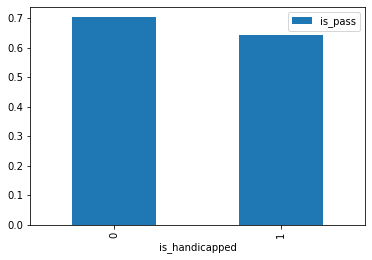

In [395]:
train.groupby(['is_handicapped','is_pass'])['is_pass'].count()
train[['is_handicapped','is_pass']].groupby(['is_handicapped']).mean().plot.bar()

#### 讲师/教学助理为课程提供学员参与度

<AxesSubplot:xlabel='trainee_engagement_rating'>

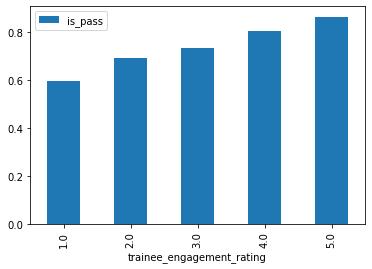

In [396]:
train.groupby(['trainee_engagement_rating','is_pass'])['is_pass'].count()
train[['trainee_engagement_rating','is_pass']].groupby(['trainee_engagement_rating']).mean().plot.bar()

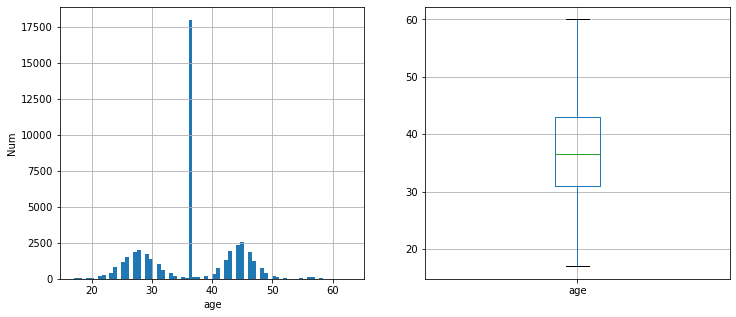

In [397]:
#总体的年龄分布
plt.figure(figsize=(12,5))
plt.subplot(121)
train['age'].hist(bins=70)
plt.xlabel('age')
plt.ylabel('Num')

plt.subplot(122)
train.boxplot(column='age', showfliers=False)
plt.show()

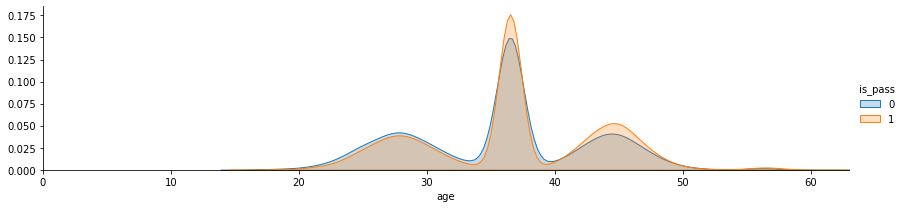

In [398]:
#不同年龄下的通过率分析
facet = sns.FacetGrid(train, hue="is_pass",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train['age'].max()))
facet.add_legend()

C:\Users\HUAWEI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\HUAWEI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



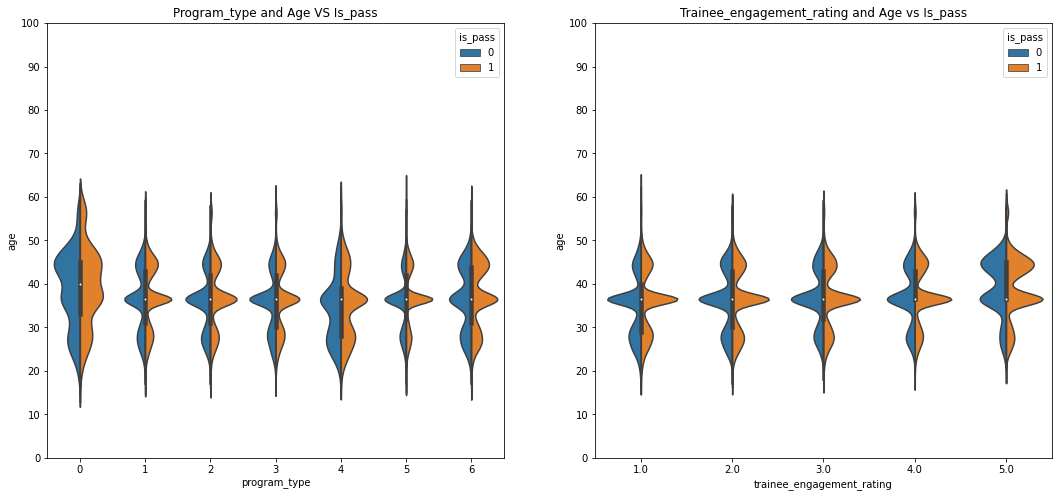

In [399]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("program_type", "age", hue="is_pass", data=train, split=True, ax=ax[0])
ax[0].set_title('Program_type and Age VS Is_pass')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("trainee_engagement_rating", "age", hue="is_pass", data=train, split=True, ax=ax[1])
ax[1].set_title('Trainee_engagement_rating and Age vs Is_pass')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [427]:
#数值类型的列
digital_cols = ['test_id','age','trainee_engagement_rating']
#非数值类型的列
category_cols = ['program_type','test_type','gender']

关于标签的处理

#数值类型的列  
digital_cols = ['program_duration','test_id','trainee_id','city_tier','total_programs_enrolled','trainee_engagement_rating']  
#非数值类型的列  
category_cols = ['program_type','test_type','difficulty_level','gender','education','is_handicapped']  

第三次调整标签
#数值类型的列
digital_cols = ['test_id','age','trainee_engagement_rating']
#非数值类型的列
category_cols = ['program_type','test_type','gender']

## 使用单个模型 线性回归 逻辑回归 KNN 随机森林

### 训练线性回归模型

In [428]:
"""from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
predictions.shape

predictions.mean()



sub = test[['id_num']].copy()
sub['is_pass'] = predictions
sub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)
sub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)
"""

"from sklearn.linear_model import LinearRegression\n\nclf = LinearRegression()\nclf.fit(train_features, train_labels)\n\npredictions = clf.predict(test_features)\npredictions.shape\n\npredictions.mean()\n\n\n\nsub = test[['id_num']].copy()\nsub['is_pass'] = predictions\nsub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)\nsub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)\n"

In [442]:
#Common Model Algorithms
from sklearn import ensemble

In [430]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

### 训练逻辑回归

In [431]:
"""from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(train_features, train_labels)

predictions = classifier.predict(test_features)
predictions.shape

predictions.mean()

sub = test[['id_num']].copy()
sub['is_pass'] = predictions
sub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)
sub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)
"""

"from sklearn.linear_model import LogisticRegression\n\nclassifier = LogisticRegression()\nclassifier.fit(train_features, train_labels)\n\npredictions = classifier.predict(test_features)\npredictions.shape\n\npredictions.mean()\n\nsub = test[['id_num']].copy()\nsub['is_pass'] = predictions\nsub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)\nsub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)"

### 实现KNN算法

In [432]:
"""
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(train_features, train_labels)

predictions = knn.predict(test_features)
predictions.shape

sub = test[['id_num']].copy()
sub['is_pass'] = predictions
sub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)
sub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)
"""

"from sklearn import neighbors\n\nknn = neighbors.KNeighborsClassifier()\nknn.fit(train_features, train_labels)\n\npredictions = knn.predict(test_features)\npredictions.shape\n\nsub = test[['id_num']].copy()\nsub['is_pass'] = predictions\nsub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)\nsub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)"

通过上面对相关性的了解 尝试去掉一些对目标影响大或不大的特征 可发现并没有出现相关性很强的 所以不用担心多重共线性问题  

In [441]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [436]:
"""
from sklearn.ensemble import RandomForestClassifier

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 30], 'max_features': [4, 5, 6]},
]
 
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
 
grid_search.fit(train_features, train_labels)

grid_search.best_params_
"""

"from sklearn.ensemble import RandomForestClassifier\n\nparam_grid = [\n{'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]},\n{'bootstrap': [False], 'n_estimators': [3, 30], 'max_features': [4, 5, 6]},\n]\n \nforest_reg = RandomForestClassifier()\ngrid_search = GridSearchCV(forest_reg, param_grid, cv=5,\n                          scoring='neg_mean_squared_error')\n \ngrid_search.fit(train_features, train_labels)\n\ngrid_search.best_params_"

In [437]:
"""
rf0 = RandomForestClassifier(oob_score=True,random_state=10)
rf0.fit(train_features, train_labels)
rtr =rf0.predict(test_features)

sub = test[['id_num']].copy()
sub['is_pass'] = rtr
sub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)
sub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)

"""

"from sklearn.ensemble import RandomForestClassifier\nrf0 = RandomForestClassifier(oob_score=True,random_state=10)\nrf0.fit(train_features, train_labels)\nrtr =rf0.predict(test_features)\n\nsub = test[['id_num']].copy()\nsub['is_pass'] = rtr\nsub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)\nsub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)"

如果使用默认设置会小于通过

第四次调整特征个数，7.1177，但是没有上升很多

第三次的参数改变有7.15

根据相关性 删减一些列，再带入knn，线性回归，xgboost，逻辑回归算法当中，发现只有knn的准确率更高了，但是增加并不明显，
根据k折交叉验证，调整最适参数，但是模型预测还是不太提升  
所以还需要做一些新的特征

In [444]:
"""

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

knn = neighbors.KNeighborsClassifier()
scores1 = cross_val_score(knn, train_features, train_labels, cv=10, scoring='accuracy')
clf = AdaBoostClassifier()
scores2 = cross_val_score(clf, train_features, train_labels, cv=10, scoring='accuracy')
rf0 = RandomForestClassifier(oob_score=True,random_state=10)
scores3 = cross_val_score(rf0, train_features, train_labels, cv=10, scoring='accuracy')
print(scores1)
print("-"*10)
print(scores2)
print('-'*10)
print(scores3)

"""

'\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.model_selection import cross_val_score\n\nknn = neighbors.KNeighborsClassifier()\nscores1 = cross_val_score(knn, train_features, train_labels, cv=10, scoring=\'accuracy\')\nclf = AdaBoostClassifier()\nscores2 = cross_val_score(clf, train_features, train_labels, cv=10, scoring=\'accuracy\')\nrf0 = RandomForestClassifier(oob_score=True,random_state=10)\nscores3 = cross_val_score(rf0, train_features, train_labels, cv=10, scoring=\'accuracy\')\nprint(scores1)\nprint("-"*10)\nprint(scores2)\nprint(\'-\'*10)\nprint(scores3)\n\n'

### 特征选择（缺失）

选择有意义的特征输入机器学习的算法和模型进行训练。  
从两个方面考虑来选择特征：  
###### 特征是否发散：
如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。  
###### 特征与目标的相关性：
与目标相关性高的特征，应当优先选择。  
根据特征选择的形式又可以将特征选择方法分为3种：  
###### Filter：过滤法
按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。  
###### Wrapper：包装法
根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。  
###### Embedded：嵌入法
先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。　

## 集成学习

In [439]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
# 生成500个决策树
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

# 度量bagging分类器的准确性
bag = bag.fit(train_features, train_labels)
y_test_pred = bag.predict(test_features)

In [440]:
sub = test[['id_num']].copy()
sub['is_pass'] =y_test_pred
sub['is_pass'] = sub['is_pass'].apply(lambda x: 1 if x > 0 else 0)
sub.to_csv('mid_term_exams/data/submission/submission.csv', index=False)

确实强大，但是还不够，为什么还是只有那么一点的升高

应用和总结详见文档